<a href="https://colab.research.google.com/github/akansha810/akansha810/blob/main/DL_Potato_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
### BUILD  Data Pipeline tfpipeline ---  tf_dataset= tf.data.Dataset.list_files("images/*").map(process_img).filter(filter_func).map(lambda x:x/255)
### load images from images folder
## Convert image content to numpy array. Extract label from folder
## filter blurred images
## scaling
## ----- tf_dataset

In [ ]:
Image_size=256
Batch_size=32
Channel=3
Epochs=50

In [ ]:
###process of loading and preprocessing image data----when you have a directory structure where images are organized into subdirectories based on their class
plant= tf.keras.preprocessing.image_dataset_from_directory("/content/drive/MyDrive/Potato/",
                                                   shuffle=True ,
                                                   image_size=(Image_size,Image_size),
                                                   batch_size=Batch_size)

Found 2152 files belonging to 3 classes.


In [ ]:
### get class label
class_names= plant.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [ ]:
### length per batch of plant dataset
len(plant)

68

In [ ]:
## total length of plant
len(plant)*Batch_size

2176

In [ ]:
'''for image_batch , label_batch in plant.take(1):
  ##The shape of image_batch will typically be (batch_size, height, width, channels)
  print(image_batch.shape)
  print(label_batch.numpy())
  print(image_batch[0].numpy)
  print(image_batch[0].shape)'''

'for image_batch , label_batch in plant.take(1):\n  ##The shape of image_batch will typically be (batch_size, height, width, channels)\n  print(image_batch.shape)\n  print(label_batch.numpy())\n  print(image_batch[0].numpy)\n  print(image_batch[0].shape)'

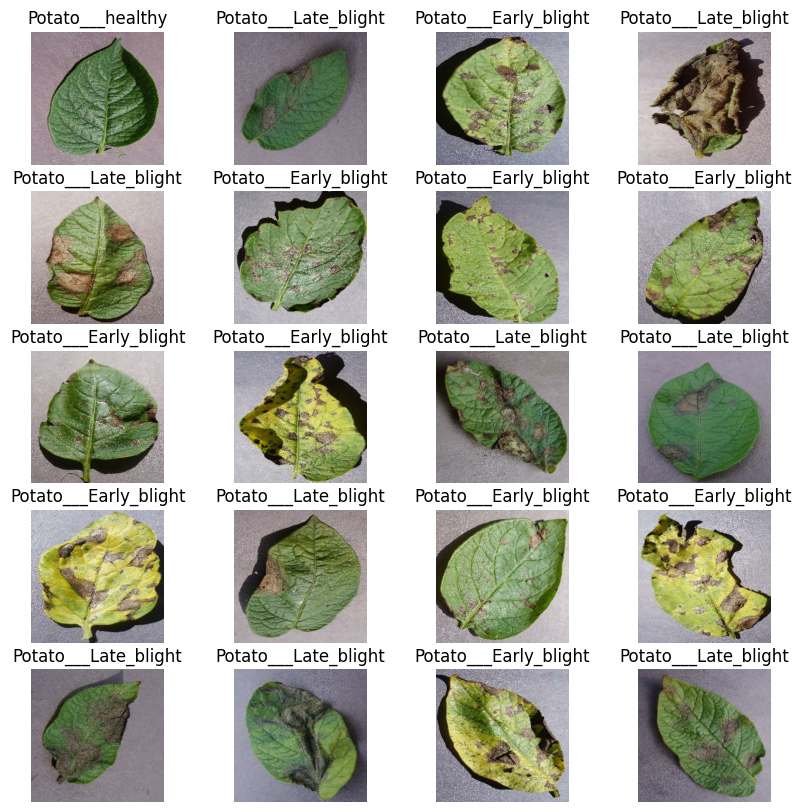

In [ ]:
## a picture
plt.figure(figsize=(10,10))
for image_batch, label_batch in plant.take(1):
  ##The shape of image_batch will typically be (batch_size, height, width, channels)
  for i in range(20):
    ax=plt.subplot(5,4,i+1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(class_names[label_batch[i]])
    plt.axis("off")

In [ ]:
'''### training size
train_size=0.8
len(plant)*train_size
### Training dataset
train_ds=plant.take(54)
len(train_ds)
### testing dataset
test_ds=plant.skip(54)
len(test_ds)
### validation size
val_size=0.1
len(plant)*val_size
## Validation dataset
test_ds= test_ds.skip(6)
len(test_ds)'''

'### training size\ntrain_size=0.8\nlen(plant)*train_size\n### Training dataset\ntrain_ds=plant.take(54)\nlen(train_ds)\n### testing dataset\ntest_ds=plant.skip(54)\nlen(test_ds)\n### validation size\nval_size=0.1\nlen(plant)*val_size\n## Validation dataset\ntest_ds= test_ds.skip(6)\nlen(test_ds)'

In [ ]:
####

def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
  ds_size=len(ds)
  if shuffle:
    ds=ds.shuffle(shuffle_size, seed=12)

  ## size
  train_size = int(train_split * ds_size)
  val_size = int(val_split * ds_size )

  ## train dataset
  train_ds=ds.take(train_size)

  ## val dataset
  ##The take method is used to select the first train_size data samples from the dataset
  val_ds=ds.skip(train_size).take(val_size)

  ## test dataset
  ##the skip method is used to skip the first train_size data samples from the original dataset
  test_ds=ds.skip(train_size).skip(val_size)


  return train_ds , val_ds , test_ds

In [ ]:
train_ds,val_ds, test_ds= get_dataset_partitions_tf(plant)

In [ ]:
len(test_ds)

8

In [ ]:
###cache--- read the image and keep the image in the memory
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
## Resizing --- if any picture which doesn't have the same dimension --- it will resize
### Scaling ---divide by 255 to make it in a range of 0-1
resize_and_rescale= tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(Image_size,Image_size),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [ ]:
#### Data augmentation
data_augmentation= tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [ ]:
## build and train a CNN Model
input_shape=(Batch_size,Image_size,Image_size,Channel)
n_classes=3
model=models.Sequential([
    resize_and_rescale,
    data_augmentation,
    ### Convolutional Layer (3,3) filter size
    layers.Conv2D(32,(3,3), activation="relu" , input_shape=input_shape),
    ### pooling layer
    layers.MaxPooling2D((2,2)),
    ### Convolution layer
    layers.Conv2D(64, kernel_size=(3,3), activation="relu"),
    ## Maxpooling
    layers.MaxPooling2D((2,2)),
    ### Convolution layer
    layers.Conv2D(64, kernel_size=(3,3), activation="relu"),
    ## Maxpooling
    layers.MaxPooling2D((2,2)),
    ### Convolution layer
    layers.Conv2D(64,(3,3), activation="relu"),
    ## Maxpooling
    layers.MaxPooling2D((2,2)),
    ### Convolution layer
    layers.Conv2D(64,(3,3), activation="relu"),
    ## Maxpooling
    layers.MaxPooling2D((2,2)),
    ### Convolution layer
    layers.Conv2D(64,(3,3), activation="relu"),
    ## Maxpooling
    layers.MaxPooling2D((2,2)),

    ### Flatten Layer
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(n_classes, activation="softmax"),
    ])

model.build(input_shape=input_shape)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [ ]:
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits= False),
    metrics=["accuracy"]
)

In [ ]:
### train the network
history=model.fit(
    train_ds,
    epochs=50,
    batch_size=Batch_size,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/50
54/54 [==============================] - 416s 132ms/step - loss: 0.9186 - accuracy: 0.4792 - val_loss: 0.8479 - val_accuracy: 0.4844
Epoch 2/50
54/54 [==============================] - 3s 61ms/step - loss: 0.7390 - accuracy: 0.6696 - val_loss: 0.5638 - val_accuracy: 0.7292
Epoch 3/50
54/54 [==============================] - 3s 60ms/step - loss: 0.5363 - accuracy: 0.7650 - val_loss: 0.3304 - val_accuracy: 0.8542
Epoch 4/50
54/54 [==============================] - 3s 61ms/step - loss: 0.3864 - accuracy: 0.8339 - val_loss: 0.3353 - val_accuracy: 0.8542
Epoch 5/50
54/54 [==============================] - 3s 62ms/step - loss: 0.3006 - accuracy: 0.8750 - val_loss: 0.2008 - val_accuracy: 0.9271
Epoch 6/50
54/54 [==============================] - 3s 61ms/step - loss: 0.2465 - accuracy: 0.9045 - val_loss: 0.1545 - val_accuracy: 0.9583
Epoch 7/50
54/54 [==============================] - 3s 61ms/step - loss: 0.2556 - accuracy: 0.8987 - val_loss: 0.3066 - val_accuracy: 0.8438
Epoch 8/50

In [ ]:
## accuracy and loss on unseen data
scores=model.evaluate(test_ds)
scores

8/8 [==============================] - 4s 27ms/step - loss: 0.0310 - accuracy: 0.9844


[0.031011881306767464, 0.984375]

In [ ]:
## check verbose , epochs and steps
history.params


{'verbose': 1, 'epochs': 50, 'steps': 54}

In [ ]:
### to check all the keys
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
acc=history.history["accuracy"]
val_acc=history.history["val_accuracy"]

loss=history.history["loss"]
val_loss=history.history["val_loss"]

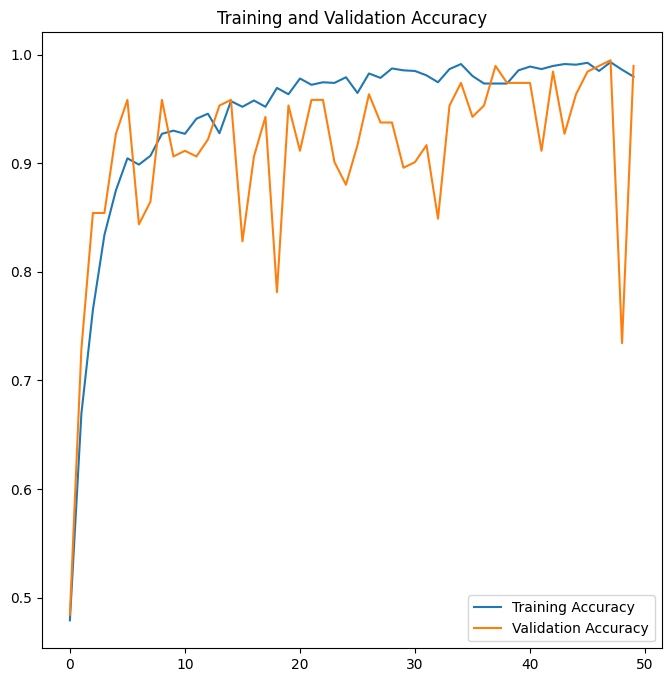

In [ ]:
### Accuracy plot
plt.figure(figsize=(8,8))
##plt.subplot(1,2,1)
plt.plot(range(Epochs),acc, label="Training Accuracy")
plt.plot(range(Epochs),val_acc, label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")
plt.show()




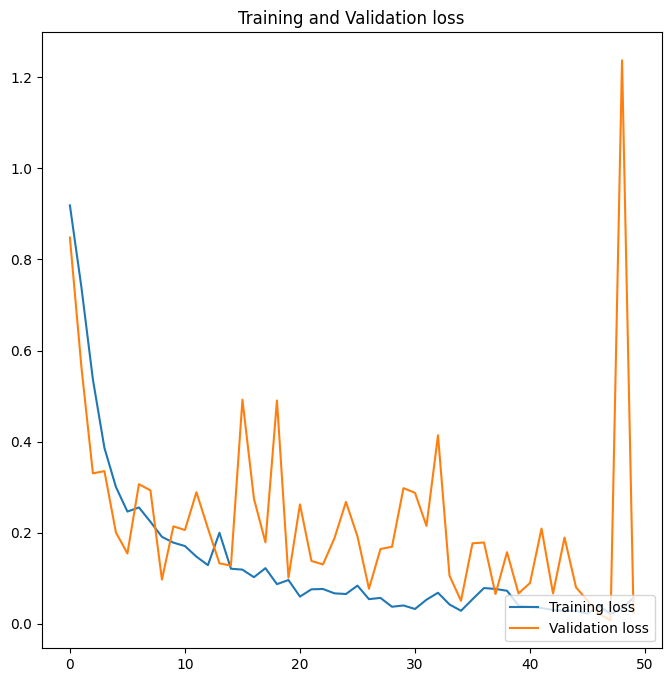

In [ ]:
### Loss plot
plt.figure(figsize=(8,8))
##plt.subplot(1,2,2)
plt.plot(range(Epochs),loss, label="Training loss")
plt.plot(range(Epochs),val_loss, label="Validation loss")
plt.legend(loc="lower right")
plt.title("Training and Validation loss")
plt.show()

First Image to Predict
Actual Label: Potato___Late_blight
1/1 [==============================] - 0s 53ms/step
Predicted Label Potato___Late_blight


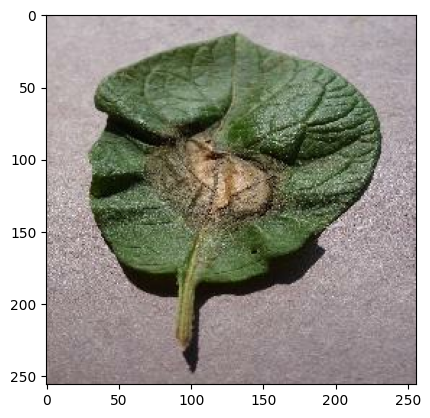

In [ ]:
### Prediction
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
  first_image= images_batch[0].numpy().astype("uint8")
  first_label =labels_batch[0].numpy()

  print("First Image to Predict")
  plt.imshow(first_image)
  print("Actual Label:", class_names[first_label])

  batch_prediction = model.predict(images_batch)
  print("Predicted Label",class_names[np.argmax(batch_prediction[0])])

In [ ]:
### prediction with confidence
def predict(model,img):
  img_array= tf.keras.preprocessing.image.img_to_array(images[i].numpy())
  img_array= tf.expand_dims(img_array,0) ## create a batch

  predictions= model.predict(img_array)

  predicted_class =class_names[np.argmax(predictions[0])]
  confidence=round(100 *(np.max(predictions[0])),2)
  return predicted_class , confidence

1/1 [==============================] - 0s 19ms/step


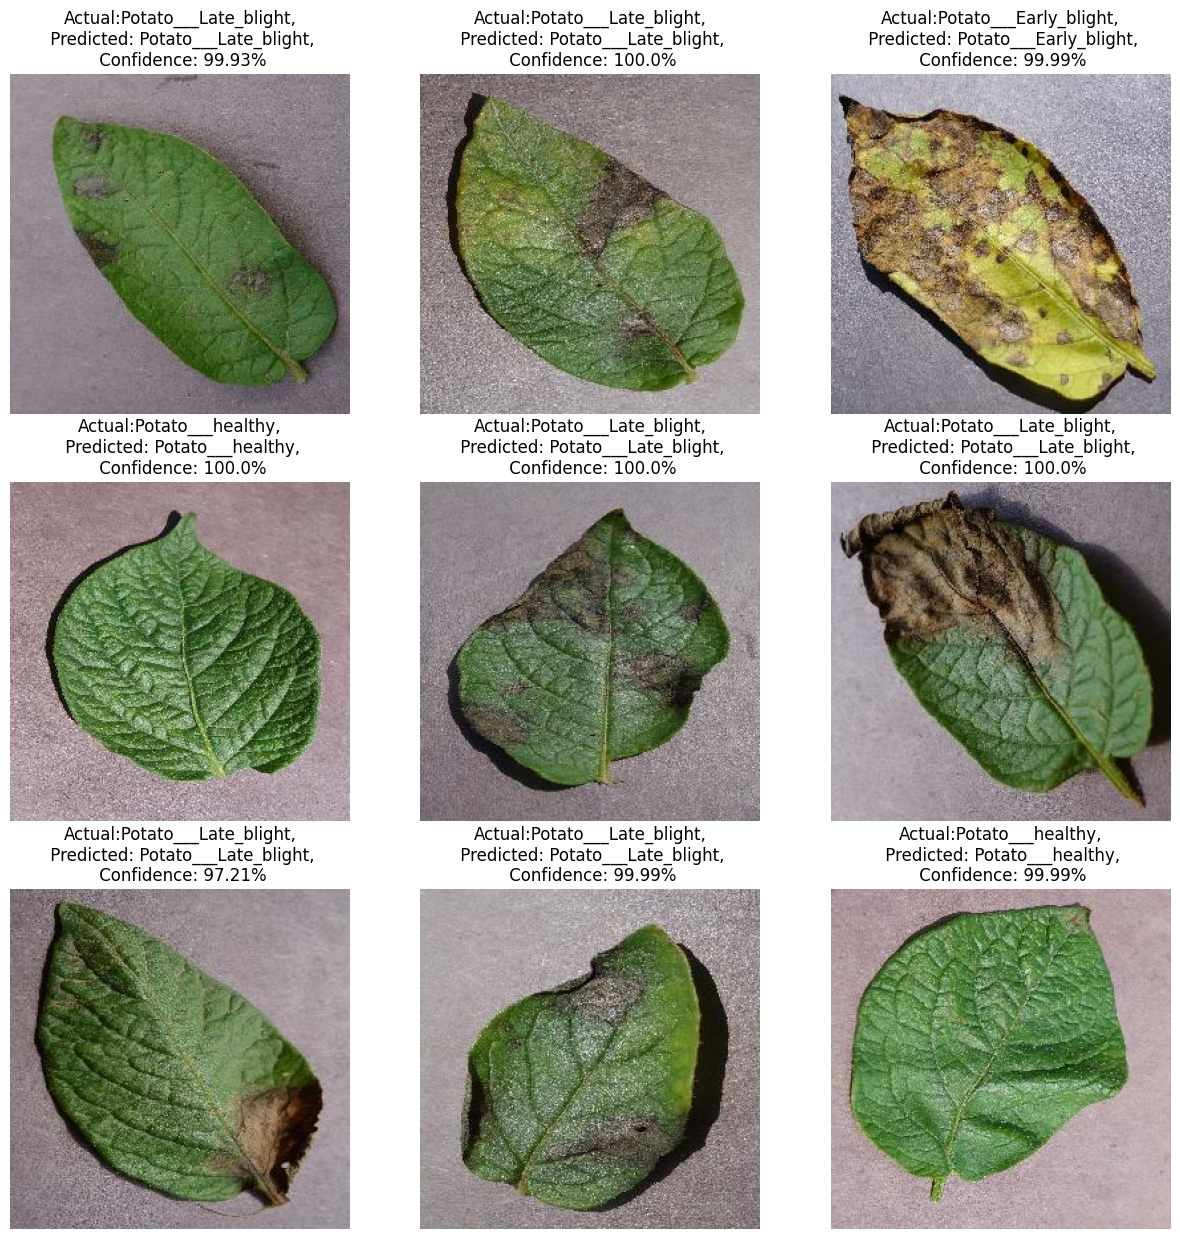

In [43]:
plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
  for i in range(9):
    ax= plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype("uint8"))

    ## predicted class
    predicted_class,  confidence = predict(model, images[i].numpy())
    actual_class = class_names[labels[i]]

    plt.title(f"Actual:{actual_class},\n Predicted: {predicted_class},\n Confidence: {confidence}%")
    plt.axis("off")

In [44]:
model_version=1
model.save(f"../models/{model_version}")